# Подготовительные работы

In [1]:
import numpy as np

In [2]:
log_space=np.logspace(-6,6,3,endpoint=True)

In [3]:
from gzip import open # NB: overrides standard open()
import pickle as pkl
import tensorly as tl
from tensorly.base import tensor_to_vec,  partial_tensor_to_vec
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
from glob import glob
import os
import math
import functools

In [4]:
warnings.simplefilter('ignore') # отключим предупреждения Anaconda

# Применяем алгоритм построения модели

In [5]:
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/88/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/88/y.pkl.gz', 'rb'))
print(Xdata_numpy['emission'].shape)

(206,)


In [6]:
#разворачиваем тензор
Xdata_numpy['X'].shape = (Xdata_numpy['X'].shape[0], Xdata_numpy['X'].shape[1] * Xdata_numpy['X'].shape[2])
Xdata_numpy['X'][:,np.isnan(Xdata_numpy['X']).any(axis = 0)] = 0 # zero out any columns containing NaN

In [7]:
#делим набор на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
     Xdata_numpy['X'], Ydata.iloc[:,2], test_size=0.2857
)
print(X_train.shape)
print(y_train.shape)

(25, 11330)
(25,)


In [8]:
#начинаем применять
pls1 = PLSRegression()
parametrsNames={
    'copy': [True], 
    'max_iter': [10000], 
    'n_components': range(1,85), 
    'scale': [True,False], 
    'tol': log_space
}

In [9]:
gridCought=GridSearchCV(pls1, parametrsNames, cv=5,return_train_score=True)
gridCought.fit(X_train,y_train)
predictors=gridCought.predict(X_test)

print(gridCought.best_params_)
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))



{'copy': True, 'max_iter': 10000, 'n_components': 3, 'scale': False, 'tol': 1e-06}
Правильность на тестовом наборе: 0.90


# Обработаем результаты

In [10]:
cvres  = gridCought.cv_results_

#### Попробуем сохранить результаты в пикль формате

In [11]:
pkl.dump(cvres,open('C:/Users/admin/Desktop/88/PLS1_Trp.pkl.gz', 'wb'))

In [12]:
pkl.dump(gridCought.best_params_,open('C:/Users/admin/Desktop/88/PLS1_bestparams_Trp.pkl.gz', 'wb'))

In [13]:
pkl.dump(gridCought.best_estimator_,open('C:/Users/admin/Desktop/88/PLS1_bestestimator_Trp.pkl.gz', 'wb'))

In [14]:
pkl.dump(gridCought.score,open('C:/Users/admin/Desktop/88/PLS1_bestscore_Trp.pkl.gz', 'wb'))

In [15]:
pkl.dump(predictors,open('C:/Users/admin/Desktop/88/PLS1_predictors_Trp.pkl.gz', 'wb'))

In [16]:
pkl.dump(y_test,open('C:/Users/admin/Desktop/88/PLS1_true_meaning_Trp.pkl.gz', 'wb'))

In [17]:
pkl.dump(y_train,open('C:/Users/admin/Desktop/88/PLS1_train_y_meaning_Trp.pkl.gz', 'wb'))

In [18]:
ylow=gridCought.cv_results_[ "mean_test_score" ]

In [19]:
xlow2=cvres[ "params" ][45]['n_components']

In [20]:
xlow2

8

In [21]:
xlow=parametrsNames['n_components']

In [22]:
xlow

range(1, 85)

### train-score

In [23]:
ylow2=gridCought.cv_results_[ "mean_train_score" ]

### Строим метки оси ох

In [24]:
xx=np.arange(-100,600,100)

In [25]:
xx

array([-100,    0,  100,  200,  300,  400,  500])

In [26]:
xlab=[]

In [27]:
for i in xx:
    xlab+=[cvres[ "params" ][i]['n_components']]

### Строим метки оси оу

In [35]:
yy=np.linspace(0.0,1.2,7)

In [37]:
yy=[0.0 , 0.2, 0.4, 0.6, 0.8, 1.0 , 1.2]

# Графики нового образца

In [38]:
xlab

[68, 1, 17, 34, 51, 67, 84]

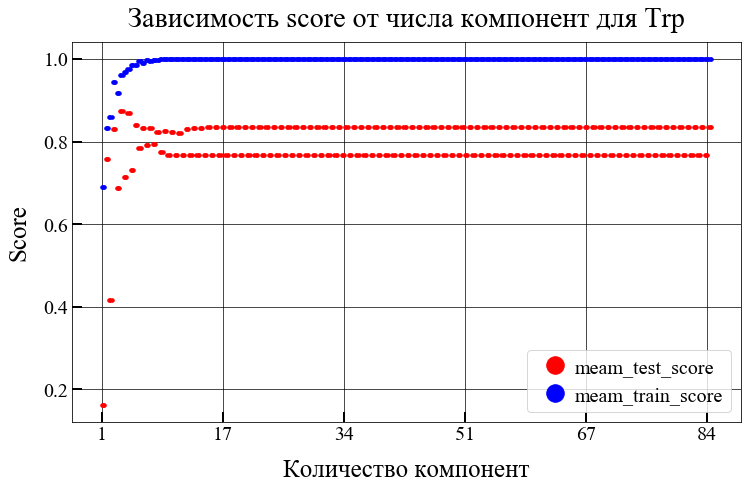

In [41]:
mpl.rc('font',family='Times New Roman')
fig, axs = plt.subplots(figsize=(12, 7))
axs.plot(ylow,".",color="red",ms=7,label="meam_test_score")
axs.plot(ylow2,".",color="blue",ms=7,label="meam_train_score")
axs.set_ylabel('Score',  fontsize=25,labelpad=12)
axs.grid(color="black",linewidth=0.7)
axs.set_xlabel("Количество компонент",  fontsize=25,labelpad=15)
axs.set_title("Зависимость score от числа компонент для Trp", fontsize=28,loc="center" ,pad=15)
axs.tick_params(which='major', length=10, width=2)
axs.set_xticklabels(xlab, fontsize=20)
axs.set_yticklabels(yy, fontsize=20)
axs.get_xaxis().set_tick_params(direction='in')
axs.get_yaxis().set_tick_params(direction='in')
axs.legend(fontsize=20, markerscale=5,handletextpad=0)

plt.savefig('Зависимость ошибки от параметров для PLS1_Trp.png', format='png', dpi=1000)
plt.show();

In [62]:
?fig.get_xaxis().set_tick_params

Object `fig.get_xaxis().set_tick_params` not found.


# Предыдущий механизм построения графика

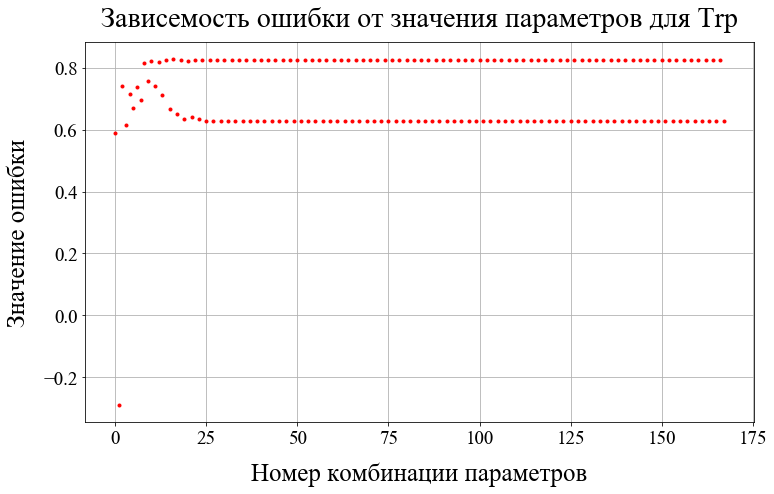

In [33]:
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')
plt.figure(figsize=(12,7))
plt.plot(ylow,".",color="red")
plt.ylabel("Значение ошибки" , fontsize=25,labelpad=12)
plt.grid()
plt.xlabel("Номер комбинации параметров",  fontsize=25,labelpad=15)
plt.title("Зависимость ошибки от значения параметров для Trp", fontsize=28,loc="center" ,pad=15)


plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.savefig('Зависимость ошибки от параметров для PLS1_Trp2.jpeg', format='png', dpi=100)
plt.show();

In [142]:
pls1.get_params()

{'copy': True, 'max_iter': 500, 'n_components': 2, 'scale': True, 'tol': 1e-06}

# Оценим правильность на тестовом наборе

In [115]:
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))

Правильность на тестовом наборе: nan


In [116]:
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(gridCought.best_score_))

Наилучшее значение кросс-валидац. правильности: 0.32


In [117]:
from  sklearn.metrics import  mean_squared_error
final_mse = mean_squared_error (y_test,  predictors) 
final_rmse  =  np.sqrt(final_mse)  
print(final_rmse)

3.0825621365425135


In [118]:
from  sklearn.metrics import accuracy_score
print(gridCought.accuracy_score(y_test,  predictors))

AttributeError: 'GridSearchCV' object has no attribute 'accuracy_score'

In [119]:
print(predictors)
print(y_test)

[[42.98438284]]
31    39.901821
Name: Gominy, dtype: float64


# Построим график для визуализации результатов

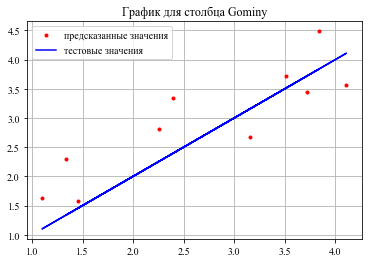

In [81]:
b=[]
for  i in range(0,5):
    b+=[i]
plt.plot(y_test,predictors, ".",color="red",label="предсказанные значения")
plt.plot(y_test,y_test,color="blue", label="тестовые значения")
plt.legend()
plt.grid(True)
plt.title("График для столбца Gominy")
plt.show();

In [153]:
area3x=np.arange(1,4.5,0.5)

In [154]:
area3y=np.arange(0,5,0.5)

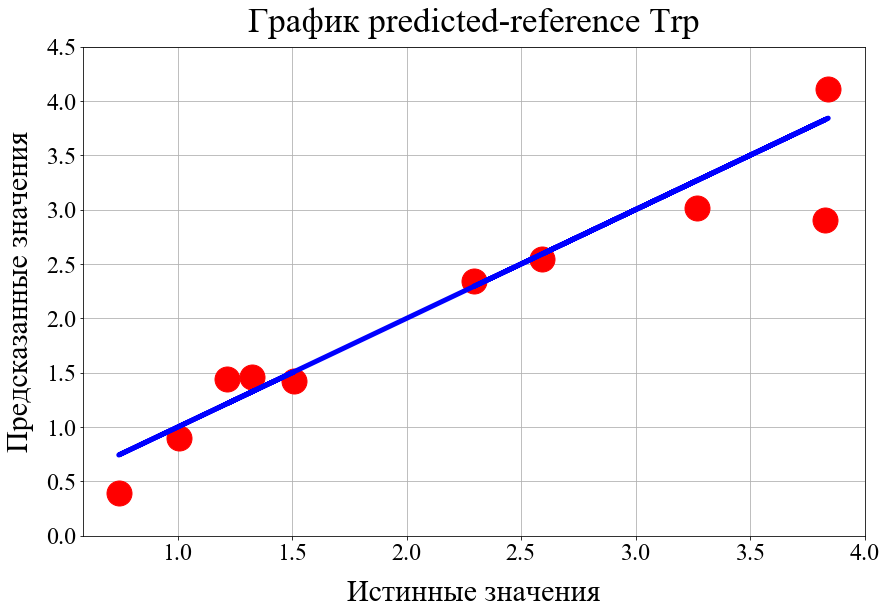

In [156]:
mpl.rc('font',family='Times New Roman')
plt.figure(figsize=(14,9))
plt.plot(y_test,predictors, ".",color="red",ms=50)
plt.plot(y_test,y_test,color="blue",lw=5)

plt.ylabel("Предсказанные значения" , fontsize=30,labelpad=12)
plt.grid()
plt.xlabel("Истинные значения",  fontsize=30,labelpad=15)
plt.title("График predicted-reference Trp", fontsize=35,loc="center" ,pad=15)


plt.yticks(area3y,fontsize=24)
plt.xticks(area3x,fontsize=24)
plt.savefig('График predicted-reference Trp.jpeg', format='png', dpi=1000)
plt.show();

In [105]:
?plt.plot

# Возьмём матрицу нагрузок

TypeError: getattr expected at least 2 arguments, got 1

In [172]:
?gridCought

In [171]:
gridCought.coef_

AttributeError: 'GridSearchCV' object has no attribute 'coef_'